In [1]:
from bs4 import BeautifulSoup

In [3]:
import requests
import pandas as pd

In [123]:
html_text1 = requests.get('https://www.timesjobs.com/candidate/job-search.html?from=submit&actualTxtKeywords=Machine%20Learning&searchBy=0&rdoOperator=OR&searchType=personalizedSearch&luceneResultSize=25&postWeek=60&txtKeywords=machine%20learning&pDate=I&sequence=9&startPage=1').text
html_text2 = requests.get('https://www.timesjobs.com/candidate/job-search.html?from=submit&actualTxtKeywords=Machine%20Learning&searchBy=0&rdoOperator=OR&searchType=personalizedSearch&luceneResultSize=25&postWeek=60&txtKeywords=machine%20learning&pDate=I&sequence=3&startPage=1').text
soup = BeautifulSoup(html_text1,'lxml')

In [124]:
jobs = soup.find_all('li',class_='clearfix job-bx wht-shd-bx')
df9 = pd.DataFrame()
a=[]
b=[]
for job in jobs:
    published_date = job.find('span',class_='sim-posted').span.text
    
        
    company_name = job.find('h3',class_='joblist-comp-name').text.replace('\r\n','').replace('\r','').replace('(More Jobs)','').replace(" ",'').replace("\n",'')
    skills = job.find('span',class_='srp-skills').text.replace('\n','').replace('\r','').replace(" ",'')
    a.append(company_name)
    b.append(skills)
        
        
df9 = pd.DataFrame(list(zip(a, b)),
               columns =['company_name', 'skills_required'])
df9

,company_name,skills_required
0,RajatShisodia,"HRManager,hrexecutive,auditexecutive,Logistic,..."
1,RajatShisodia,"HRManager,DeputyManager,assistantmanager,finan..."
2,RajatShisodia,"HRManager,LogisticsManager,SupplyChain,project..."
3,RajatShisodia,"HRManager,COORDINATOR,administration,projectma..."
4,RajatShisodia,"HRManager,assistantmanagerhr,HumanResourcs,Rec..."
5,RajatShisodia,"HRManager,bdm,marketingexecutive,seniormarketi..."
6,RajatShisodia,"HRManager,ExecutiveBoard,Ms-office,Office-mgmt..."
7,RajatShisodia,"HRManager,assistantmanagerhr,Recruitment,consu..."
8,RajatShisodia,"HRManager,hrrecruiter,testingengineer,technica..."
9,RajatShisodia,"HRManager,assistantmanagerhr,Recruitment,hrexe..."


In [212]:
final_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9],axis = 0)
final_df

,company_name,skills_required
0,APPLYCUPHIRINGSOLUTIONSLLP,"imageprocessing,algorithms,python,c,c,naturall..."
1,cornerstonesolutions,"algorithms,bi,imageprocessing,python,naturalla..."
2,MaximusOne,"MachineLearning,,deepLearning"
3,MaxgenTechnologies,.
4,MaxgenTechnologies,.
...,...,...
20,RajatShisodia,"HRManager,legal,FinancialProducts,Accounting,A..."
21,RajatShisodia,"HRManager,assistantmanagerhr,HumanResourcs,Rec..."
22,RajatShisodia,"HRManager,hrexecutive,auditexecutive,Tax,Accou..."
23,RajatShisodia,"HRManager,managerhr,Engineering,Civil,Site,Rec..."


In [53]:
final_df = pd.read_csv('final_df_scraped.csv')
final_df['skills_required'] = final_df['skills_required'].apply(lambda x:x.lower())
final_df

,company_name,skills_required
0,APPLYCUPHIRINGSOLUTIONSLLP,"imageprocessing,algorithms,python,c,c,naturall..."
1,cornerstonesolutions,"algorithms,bi,imageprocessing,python,naturalla..."
2,MaximusOne,"machinelearning,,deeplearning"
3,MaxgenTechnologies,.
4,MaxgenTechnologies,.
...,...,...
220,RajatShisodia,"hrmanager,legal,financialproducts,accounting,a..."
221,RajatShisodia,"hrmanager,assistantmanagerhr,humanresourcs,rec..."
222,RajatShisodia,"hrmanager,hrexecutive,auditexecutive,tax,accou..."
223,RajatShisodia,"hrmanager,managerhr,engineering,civil,site,rec..."


In [54]:
final_df.nunique()

company_name        76
skills_required    189
dtype: int64

In [55]:
b = final_df['skills_required'].str.get_dummies(sep=',')
print(b.shape)
c = pd.DataFrame()
c['first'] = b.columns
d = b.sum(axis=0)
d = d.values

(225, 455)


In [56]:
c['second']= d
c = c.sort_values(by=['second'], ascending=False).reset_index(drop=True)

c.head(30)

,first,second
0,machinelearning,150
1,python,131
2,algorithms,79
3,java,63
4,infrastructure,55
5,scala,47
6,bigdata,47
7,san,45
8,hrmanager,45
9,sql,33


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

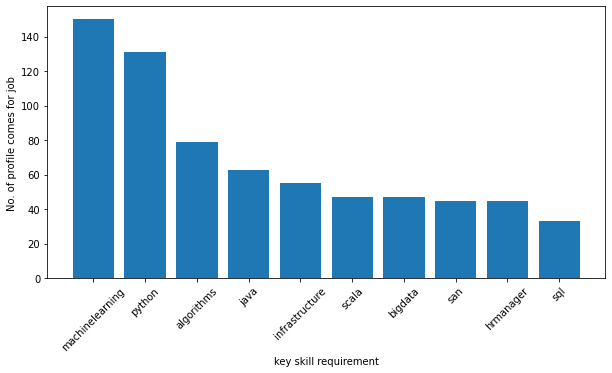

In [58]:
fig = plt.figure(figsize = (10, 5))
plt.bar(c['first'][:10] , c['second'][:10])
plt.xticks(rotation=45)
plt.xlabel('key skill requirement')
plt.ylabel('No. of profile comes for job')
plt.show()

In [64]:
series = c['first'][:30]
df = final_df.copy()
series = series.tolist()
series

['machinelearning',
 'python',
 'algorithms',
 'java',
 'infrastructure',
 'scala',
 'bigdata',
 'san',
 'hrmanager',
 'sql',
 'artificialintelligence',
 'c',
 'docker',
 'softwareengineering',
 'database',
 'linux',
 'conference',
 'naturallanguageprocessing',
 'opencv',
 'hr',
 'problemsolving',
 'hadoop',
 'recruitment',
 'nosql',
 'datamining',
 'consultant',
 'git',
 'writtencommunication',
 'teamplayer',
 'security']

In [65]:
type(final_df['skills_required'][0].split(','))
df['skills_required'] = df['skills_required'].apply(lambda x: x.split(','))

In [66]:

    
df['skills_required']  = df['skills_required'].apply(lambda x:[i for i in x if i in series])
df

,company_name,skills_required
0,APPLYCUPHIRINGSOLUTIONSLLP,"[algorithms, python, c, c, naturallanguageproc..."
1,cornerstonesolutions,"[algorithms, python, naturallanguageprocessing..."
2,MaximusOne,[machinelearning]
3,MaxgenTechnologies,[]
4,MaxgenTechnologies,[]
...,...,...
220,RajatShisodia,"[hrmanager, hr]"
221,RajatShisodia,"[hrmanager, recruitment]"
222,RajatShisodia,"[hrmanager, hr]"
223,RajatShisodia,"[hrmanager, recruitment, consultant]"


In [67]:
df['skills_required'] = df['skills_required'].apply(lambda x : ",".join(x))
df

,company_name,skills_required
0,APPLYCUPHIRINGSOLUTIONSLLP,"algorithms,python,c,c,naturallanguageprocessin..."
1,cornerstonesolutions,"algorithms,python,naturallanguageprocessing,ma..."
2,MaximusOne,machinelearning
3,MaxgenTechnologies,
4,MaxgenTechnologies,
...,...,...
220,RajatShisodia,"hrmanager,hr"
221,RajatShisodia,"hrmanager,recruitment"
222,RajatShisodia,"hrmanager,hr"
223,RajatShisodia,"hrmanager,recruitment,consultant"


In [70]:
type(df['skills_required'][0])

str

In [71]:
b = df['skills_required'].str.get_dummies(sep=',')
b

,algorithms,artificialintelligence,bigdata,c,conference,consultant,database,datamining,docker,git,...,problemsolving,python,recruitment,san,scala,security,softwareengineering,sql,teamplayer,writtencommunication
0,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
from sklearn.cluster import KMeans

In [74]:
kmeans = KMeans(3)
kmeans.fit(b)

C:\Users\HARSH PATEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

C:\Users\HARSH PATEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HARSH PATEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HARSH PATEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HARSH PATEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have

Text(0, 0.5, 'WCSS')

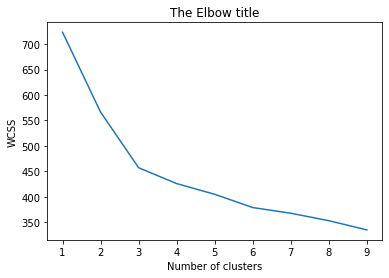

In [96]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(b)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [75]:
identified_clusters = kmeans.fit_predict(b)
identified_clusters

C:\Users\HARSH PATEL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [94]:
d = b.copy()
d['Clusters'] = identified_clusters 
gk = d.groupby('Clusters')
fg = gk.first()
fg.T

Clusters,0,1,2
algorithms,1,0,0
artificialintelligence,0,0,0
bigdata,0,0,1
c,1,0,0
conference,0,0,0
consultant,0,0,0
database,0,0,1
datamining,0,0,0
docker,0,0,0
git,0,0,0


In [85]:
new_df=  pd.DataFrame()
new_df['company_name'] = df['company_name']
new_df['cluster'] = identified_clusters
new_df

,company_name,cluster
0,APPLYCUPHIRINGSOLUTIONSLLP,0
1,cornerstonesolutions,0
2,MaximusOne,1
3,MaxgenTechnologies,1
4,MaxgenTechnologies,1
...,...,...
220,RajatShisodia,1
221,RajatShisodia,1
222,RajatShisodia,1
223,RajatShisodia,1


In [88]:
new_df['cluster'].value_counts()

0    108
1     85
2     32
Name: cluster, dtype: int64

In [97]:
cluster_0 = ['algorithms','c','machine learning','NLP','OpenCv','Python']
cluster_1 = ['machine learning']
cluster_2 = ['big Data','infrastructure','java','database','machine learning','pythob','scala','san']